##***Time Series Analysis and Forecasting of Air Passenger Data Set***

In [ ]:
#Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd /content/drive/My Drive/Colab Notebooks/Time Series

In [ ]:
#importing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset
%matplotlib inline

In [5]:
#loading the csv file
df=pd.read_csv('datasets_1057_1913_AirPassengers.csv')
df.head(6)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135


In [6]:
#publishing last few records of the DataFrame
df.tail(6)

,Month,#Passengers
138,1960-07,622
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [7]:
#cleaning the meta data
df.columns = ['Month','Passengers']
df.head(6)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135


In [8]:
#checking if there are null values
df.isna().values.any()

False

In [9]:
#finding out the rows of null values (Cross validating)
df[(df['Month'].isnull())]

,Month,Passengers


In [10]:
#dropping the rows with null values
print('Initial number of rows :',df.shape[0])
df = df.dropna(axis=0)
print('Final number of rows   :',df.shape[0])

Initial number of rows : 144
Final number of rows   : 144


In [11]:
#convert month column into Datatime format of Pandas
df['Month'] = pd.to_datetime(df['Month'])

In [12]:
#publishing the top rows of DataFrame
df.head(6)

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
5,1949-06-01,135


In [13]:
#setting month as index
df.set_index('Month',inplace=True)
df.head(6)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135


In [14]:
#getting an overview
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


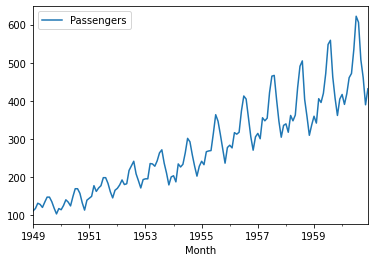

In [15]:
#visualizing the data
df.plot()
plt.show()

In [16]:
#testing for stationary nature of time series Data using the Dickey-fuller test
test_result = adfuller(df['Passengers'])
label       = ['Test Stat','P value','Lag Used','Number of observation used']
for val,label in zip(test_result,label):
  print(label, val)

Test Stat 0.815368879206047
P value 0.991880243437641
Lag Used 13
Number of observation used 130


In [17]:
#as value in greater than 0.05 we have enough evidence to accept the null hypothesis that is series is non-stationary, now doing differencing
df['passengers_with_1_diff'] = df['Passengers'] - df['Passengers'].shift(12)

In [18]:
#publishing top 15 rows
df.head(15)

,Passengers,passengers_with_1_diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,NaN
1949-03-01,132,NaN
1949-04-01,129,NaN
1949-05-01,121,NaN
1949-06-01,135,NaN
1949-07-01,148,NaN
1949-08-01,148,NaN
1949-09-01,136,NaN


In [19]:
#testing for stationary nature of time series Data using the Dickey-fuller test
test_result = adfuller(df['passengers_with_1_diff'].dropna())
label       = ['Test Stat','P value','Lag Used','Number of observation used']
for val,label in zip(test_result,label):
  print(label, val)

Test Stat -3.383020726492481
P value 0.011551493085514952
Lag Used 1
Number of observation used 130


[]

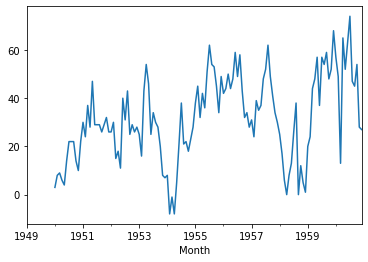

In [20]:
#plotting the 1st difference, we used 12 because it is seasonal with periodicity of 12 months
df['passengers_with_1_diff'].plot()
plt.plot()

In [23]:
#as value in greater than 0.05 we have enough evidence to accept the null hypothesis that is series is non-stationary, now doing differencing
df['passengers_with_2_diff'] = df['passengers_with_1_diff'] - df['passengers_with_1_diff'].shift(12)

In [25]:
#publishing top 15 rows
df[20:30]

,Passengers,passengers_with_1_diff,passengers_with_2_diff
Month,,,
1950-09-01,158,22.0,NaN
1950-10-01,133,14.0,NaN
1950-11-01,114,10.0,NaN
1950-12-01,140,22.0,NaN
1951-01-01,145,30.0,27.0
1951-02-01,150,24.0,16.0
1951-03-01,178,37.0,28.0
1951-04-01,163,28.0,22.0
1951-05-01,172,47.0,43.0


In [26]:
#testing for stationary nature of time series Data using the Dickey-fuller test
test_result = adfuller(df['passengers_with_2_diff'].dropna())
label       = ['Test Stat','P value','Lag Used','Number of observation used']
for val,label in zip(test_result,label):
  print(label, val)

Test Stat -2.765380673627125
P value 0.06339157882390209
Lag Used 12
Number of observation used 107


[]

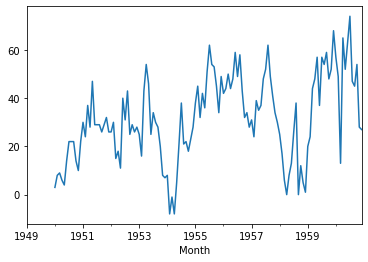

In [27]:
#plotting the 1st difference, we used 12 because it is seasonal with periodicity of 12 months
df['passengers_with_1_diff'].plot()
plt.plot()

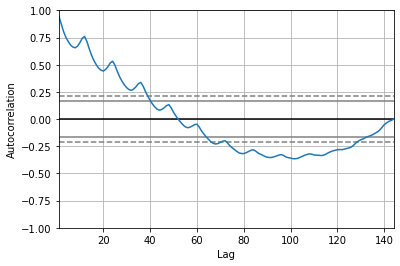

In [21]:
#plotting the auto correlation plot
autocorrelation_plot(df['Passengers'])
plt.show()

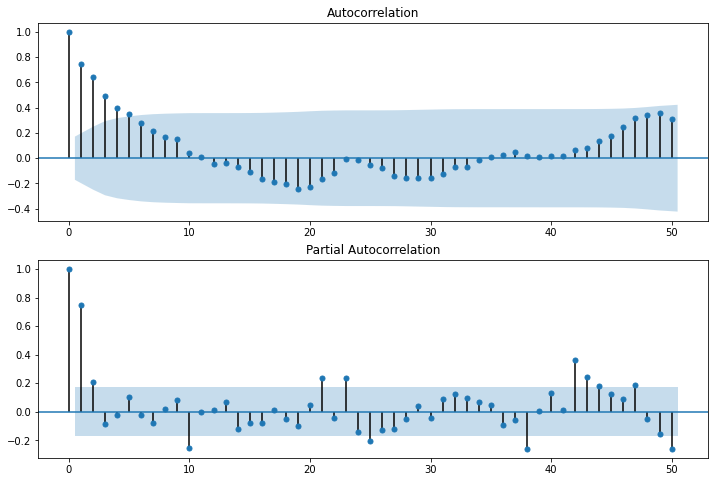

In [22]:
#plotting the autocorrelation and partial autocorrelation
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['passengers_with_1_diff'].iloc[13:],lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['passengers_with_1_diff'].iloc[13:],lags=50,ax=ax2)

In [28]:
#from abbe above graphs we conclude values of p, q and d as below
p = 4
q = 2
d = 1

In [29]:
#doing modeling over the sales data now
model=ARIMA(df['Passengers'],order=(p,d,q))
model_fit=model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [30]:
#brief summary
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Passengers   No. Observations:                  143
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -670.075
Method:                       css-mle   S.D. of innovations             25.739
Date:                Thu, 03 Sep 2020   AIC                           1356.151
Time:                        09:20:27   BIC                           1379.854
Sample:                    02-01-1949   HQIC                          1365.783
                         - 12-01-1960                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.6799      0.112     24.035      0.000       2.461       2.898
ar.L1.D.Passengers     0.2318      0.102      2.271      0.025       0.032       0.432
ar.L2.D.Passengers     0.3756      0.113      3.321      0.001       0.154       0.597
ar.L3.D.Passengers    -0.2542      0.099     -2.580      0.011      -0.447      -0.061
ar.L4.D.Passengers    -0.2290      0.086     -2.652      0.009      -0.398      -0.060
ma.L1.D.Passengers    -0.1225      0.097     -1.267      0.207      -0.312       0.067
ma.L2.D.Passengers    -0.8775      0.091     -9.623      0.000      -1.056      -0.699
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9821           -0.7411j            1.2304           -0.1029
AR.2            0.9821           +0.7411j            1.2304            0.1029
AR.3           -1.5373           -0.7222j            1.6985           -0.4301
AR.4           -1.5373           +0.7222j            1.6985            0.4301
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.1396           +0.0000j            1.1396            0.5000
-----------------------------------------------------------------------------
"""

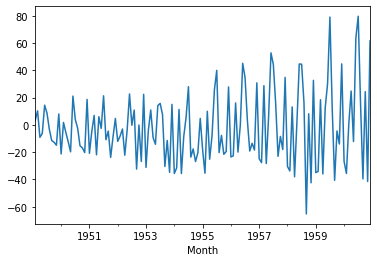

In [31]:
#plotting the errors in the model
model_fit.resid.plot()
plt.show()

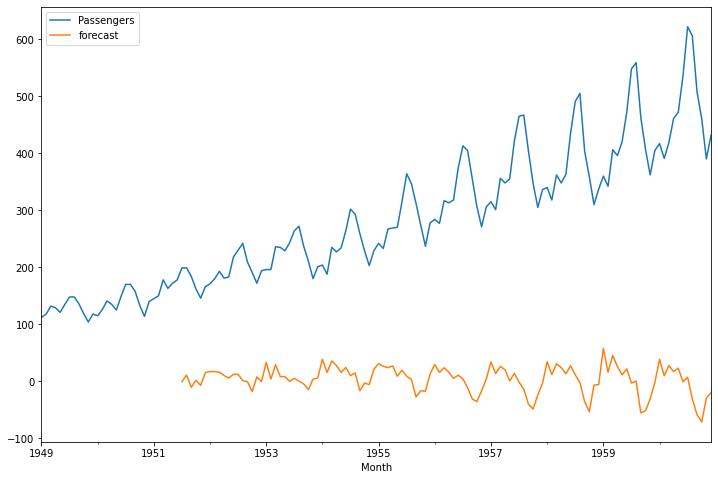

In [38]:
#as we already saw error is there in the model, forecast won't be very good
df['forecast']=model_fit.predict(start=30,end=143,dynamic=False)
df[['Passengers','forecast']].plot(figsize=(12,8))
plt.show()

In [39]:
#now using the sarimax model, that is Seasonal ARIMA
model   = sm.tsa.statespace.SARIMAX(df['Passengers'],order=(p, d, q),seasonal_order=(p,d,q,12))
results = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


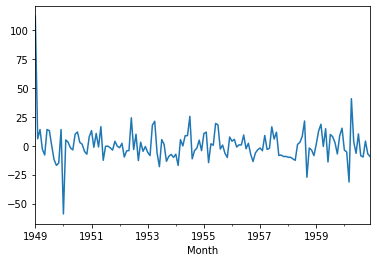

In [40]:
#let us see the error now
results.resid.plot()
plt.show()

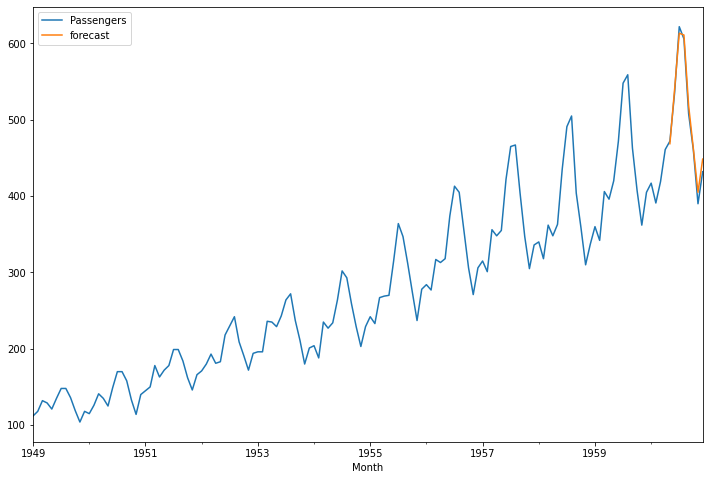

In [43]:
#let us check on the data now
df['forecast'] = results.predict(start=136,end=143,dynamic=True)
df[['Passengers','forecast']].plot(figsize=(12,8))
plt.show()

In [45]:
#publishing the top rows of final df
df.tail(20)

,Passengers,passengers_with_1_diff,passengers_with_2_diff,forecast
Month,,,,
1959-05-01,420,57.0,49.0,NaN
1959-06-01,472,37.0,24.0,NaN
1959-07-01,548,57.0,31.0,NaN
1959-08-01,559,54.0,16.0,NaN
1959-09-01,463,59.0,59.0,NaN
1959-10-01,407,48.0,36.0,NaN
1959-11-01,362,52.0,47.0,NaN
1959-12-01,405,68.0,67.0,NaN
1960-01-01,417,57.0,37.0,NaN


In [46]:
#creating extra dates for forecasting
future_dates = []
for i in range(24):
  future_dates.append(df.index[-1]+DateOffset(months=i))
future_dates[:5]

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00')]

In [47]:
#creating an empty DataFrame
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_datest_df.head(6)

,Passengers,passengers_with_1_diff,passengers_with_2_diff,forecast
1961-01-01,NaN,NaN,NaN,NaN
1961-02-01,NaN,NaN,NaN,NaN
1961-03-01,NaN,NaN,NaN,NaN
1961-04-01,NaN,NaN,NaN,NaN
1961-05-01,NaN,NaN,NaN,NaN
1961-06-01,NaN,NaN,NaN,NaN


In [48]:
#concatinating with the main DataFrame
future_df=pd.concat([df,future_datest_df])
future_df.head(6)

,Passengers,passengers_with_1_diff,passengers_with_2_diff,forecast
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,NaN
1949-03-01,132,NaN,NaN,NaN
1949-04-01,129,NaN,NaN,NaN
1949-05-01,121,NaN,NaN,NaN
1949-06-01,135,NaN,NaN,NaN


In [49]:
#publishing the last rows of the DataFrame
future_df.tail(6)

,Passengers,passengers_with_1_diff,passengers_with_2_diff,forecast
1962-06-01,NaN,NaN,NaN,NaN
1962-07-01,NaN,NaN,NaN,NaN
1962-08-01,NaN,NaN,NaN,NaN
1962-09-01,NaN,NaN,NaN,NaN
1962-10-01,NaN,NaN,NaN,NaN
1962-11-01,NaN,NaN,NaN,NaN


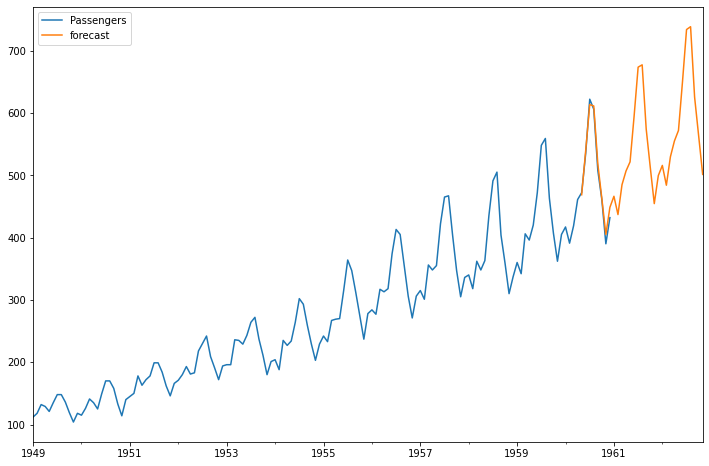

In [52]:
#predicting the values of sales now
future_df['forecast'] = results.predict(start = 136, end = 166, dynamic=True)  
future_df[['Passengers', 'forecast']].plot(figsize=(12, 8))
plt.show()

###***--End of Notebook--***